In [ ]:
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Input
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import np_utils

In [ ]:
(train_images, train_labels),(test_images,test_labels)=cifar10.load_data()

In [ ]:
print(train_images.shape)

(50000, 32, 32, 3)


In [ ]:
subclass=[0,8,9]
def subsets(data):
  a = []
  for index,labels in enumerate(data):
    if labels in [0,1,2]:
      a.append(index)
      
  return a

i_train = subsets(train_labels)
i_test = subsets(test_labels)

train_images= train_images[i_train]
train_labels = train_labels[i_train]

test_images = test_images[i_test]
test_labels = test_labels[i_test]

print(train_images.shape)  
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(15000, 32, 32, 3)
(15000, 1)
(3000, 32, 32, 3)
(3000, 1)


In [ ]:
#We will reshape the images into the 1D arrays of 3072 pixels that we expect
train_images = train_images.reshape(15000,32*32*3) 
test_images = test_images.reshape(3000,32*32*3)
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
#Divide the image by 255 in order to  normalize it into 0-1 range
train_images/=255.0
test_images/=255.0
#print(test_images)
#print(train_images.shape)


#one-hot encoding 
new_train_labels= np_utils.to_categorical(train_labels,10)
new_test_labels =  np_utils.to_categorical(test_labels,10)


#dividing in validation and training sets
x_val=train_images[:3000]
x_train=train_images[3000:]

y_val=new_train_labels[:3000]
y_train=new_train_labels[3000:]

print(x_val.shape)
print(y_val.shape)
print(x_train.shape)
print(y_train.shape)

(3000, 3072)
(3000, 10)
(12000, 3072)
(12000, 10)


In [ ]:
model= Sequential()
model.add(Dense(units=300,activation='relu',input_shape=(32*32*3,)))
model.add(Dropout(0.5))
model.add(Dense(units=200))
model.add(Dropout(0.5))
model.add(Dense(units=100))
model.add(Dense(20))
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 300)               921900    
_________________________________________________________________
dropout_12 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 200)               60200     
_________________________________________________________________
dropout_13 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_33 (Dense)             (None, 20)                2020      
_________________________________________________________________
dense_34 (Dense)             (None, 10)               

In [ ]:
opt1 =keras.optimizers.RMSprop(
    learning_rate=0.001,
    epsilon=1e-07,
    name="RMSprop")

opt=keras.optimizers.Adagrad(
    learning_rate=0.003,
    #initial_accumulator_value=,
    epsilon=1e-07,
    name="Adagrad"
    
)
#model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, 
                    epochs=20, validation_data=(x_val,y_val))

Epoch 1/20
375/375 [==============================] - 5s 11ms/step - loss: 1.2624 - accuracy: 0.4639 - val_loss: 0.7678 - val_accuracy: 0.6897
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.8622 - accuracy: 0.6324 - val_loss: 0.7343 - val_accuracy: 0.7070
Epoch 3/20
375/375 [==============================] - 4s 11ms/step - loss: 0.8114 - accuracy: 0.6575 - val_loss: 0.6957 - val_accuracy: 0.7233
Epoch 4/20
375/375 [==============================] - 4s 10ms/step - loss: 0.7807 - accuracy: 0.6780 - val_loss: 0.6895 - val_accuracy: 0.7360
Epoch 5/20
375/375 [==============================] - 4s 10ms/step - loss: 0.7537 - accuracy: 0.6945 - val_loss: 0.6769 - val_accuracy: 0.7257
Epoch 6/20
375/375 [==============================] - 4s 10ms/step - loss: 0.7305 - accuracy: 0.7081 - val_loss: 0.6499 - val_accuracy: 0.7443
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.7216 - accuracy: 0.7066 - val_loss: 0.6509 - val_accuracy: 0.7377

In [ ]:
#Evaluating the performance on test data
test_loss, test_accuracy = model.evaluate(test_images, new_test_labels)

94/94 [==============================] - 0s 4ms/step - loss: 0.5548 - accuracy: 0.7813


In [ ]:
model.save('AS1_Problem2.h5')

In [ ]:
model.get_weights()

[array([[ 0.00664621,  0.04338345, -0.03730684, ...,  0.00255005,
         -0.03311923, -0.03262624],
        [-0.01060608, -0.0352494 ,  0.00425118, ...,  0.03068739,
          0.01376142,  0.01428491],
        [ 0.01389987, -0.00194891, -0.02960445, ..., -0.01170764,
          0.01609125,  0.00918303],
        ...,
        [-0.02062044,  0.00126221,  0.00209535, ..., -0.00339021,
         -0.00464864,  0.00931274],
        [ 0.04233657,  0.03709281, -0.01312451, ..., -0.00832127,
         -0.00040178, -0.02064794],
        [ 0.00232692, -0.00722814, -0.02431229, ...,  0.00315001,
         -0.02955656, -0.04004427]], dtype=float32),
 array([ 1.58550274e-02,  9.99079458e-03, -2.26113829e-03, -1.14906942e-02,
        -5.13594889e-04, -1.81674573e-03,  2.01518997e-03,  3.61914601e-04,
        -9.94400034e-06, -5.02048817e-04,  3.12947966e-02, -4.22447734e-03,
         7.02847075e-03,  4.70052983e-05,  1.90632918e-03,  0.00000000e+00,
        -8.67913244e-04, -2.72058025e-02, -3.77590163e

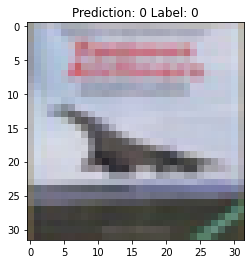

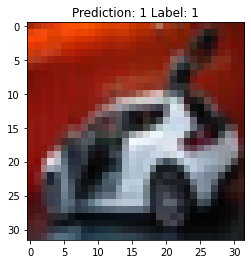

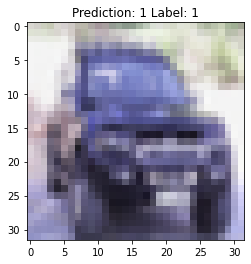

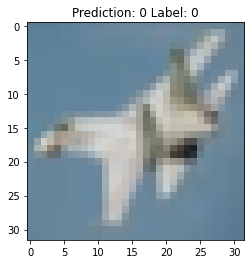

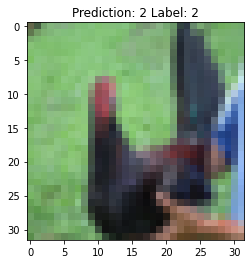

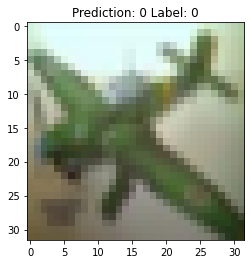

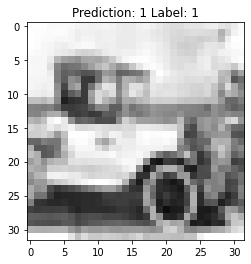

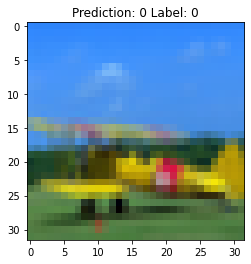

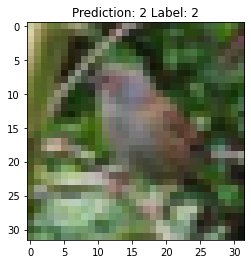

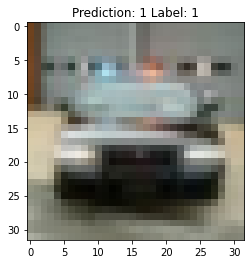

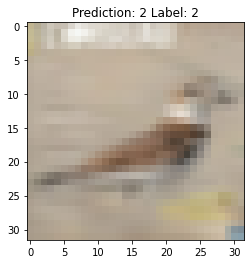

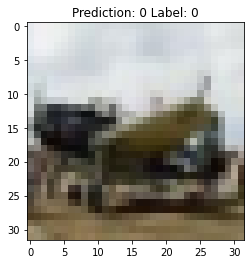

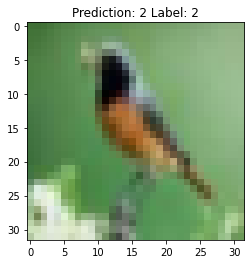

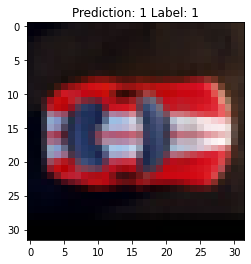

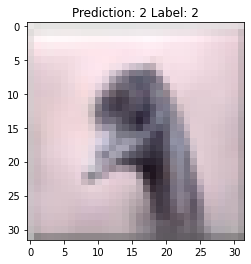

In [ ]:
for x in range(20):
    test_image = test_images[x,:].reshape(1,32*32*3)
    predicted_cat = model.predict(test_image).argmax()
    label = new_test_labels[x].argmax()
    if (predicted_cat == label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([32,32,3]))
        plt.show()

Text(0.5, 0, 'epoch')

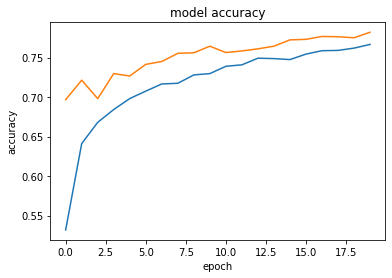

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epochs')

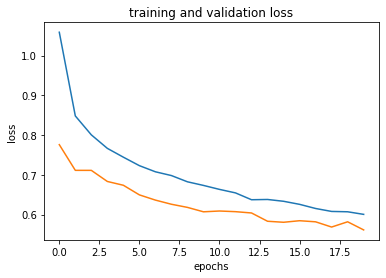

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training and validation loss')
plt.ylabel('loss')
plt.xlabel('epochs')